In [33]:
from pandas import DataFrame
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
from sklearn.model_selection import cross_validate
import pandas
import matplotlib
from sklearn.model_selection import train_test_split

In [34]:
input_file = "IMDB Dataset.csv"
data = pandas.read_csv(input_file, header = 0)
original_headers = list(data.columns.values)

In [35]:
print(data.head())
print(data.tail())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
                                                  review sentiment
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative


In [36]:
print("\n")
print(data.describe())



                                                   review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  positive
freq                                                    5     25000


In [37]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(f"\nCategorical columns: {categorical_columns}")
print(f"Numerical columns: {numerical_columns}")


Categorical columns: ['review', 'sentiment']
Numerical columns: []


In [38]:
print("\n")
for c in categorical_columns:
    print (f"Unique '{c}' values: {len(data[c].unique())}")



Unique 'review' values: 49582
Unique 'sentiment' values: 2


Check for empty values

In [39]:
print(data.count(axis=0))

review       50000
sentiment    50000
dtype: int64


In [40]:
data_describe = data.describe(include=[object])
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(f"\nBinary: {str(binary_columns)}")
print(f"Non-binary: {str(nonbinary_columns)}")


Binary: ['sentiment']
Non-binary: ['review']


In [41]:
data.sentiment = data.sentiment.apply(lambda x: 0 if x == "negative" else 1)

In [42]:
print("\n")
print(data.head())



                                              review  sentiment
0  One of the other reviewers has mentioned that ...          1
1  A wonderful little production. <br /><br />The...          1
2  I thought this was a wonderful way to spend ti...          1
3  Basically there's a family where a little boy ...          0
4  Petter Mattei's "Love in the Time of Money" is...          1


In [43]:
vectorizer = CountVectorizer()
# vectorizer = CountVectorizer(stop_words="english"б, ngram_range=(1,2), min_df=0.1, max_features = 100000)

In [44]:
X = data["review"]
y = data["sentiment"]
X_cv, X_test, y_cv, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11, stratify=y)
X_train, X_validate, y_train, y_validate = train_test_split(X_cv, y_cv, test_size = 0.25, random_state = 11, stratify=y_cv)

In [45]:
X_train = vectorizer.fit_transform(X_train)
X_validate = vectorizer.transform(X_validate)
X_test = vectorizer.transform(X_test)

In [46]:
logreg = LogisticRegression(random_state=0, max_iter=10000)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
scores_validation = cross_validate(logreg, X_validate, y_validate, cv = 5, scoring=("f1", "accuracy", "precision", "recall", "roc_auc"))
print("\n")

In [48]:
print("P: %0.2f (+/- %0.3f)" % (scores_validation["test_precision"].mean(), scores_validation["test_precision"].std() / 2))
print("R: %0.2f (+/- %0.3f)" % (scores_validation["test_recall"].mean(), scores_validation["test_recall"].std() / 2))
print("F1: %0.2f (+/- %0.3f)" % (scores_validation["test_f1"].mean(), scores_validation["test_f1"].std() / 2))
print("A: %0.2f (+/- %0.3f)" % (scores_validation["test_accuracy"].mean(), scores_validation["test_accuracy"].std() / 2))
print("ROC_AUC: %0.2f (+/- %0.3f)" % (scores_validation["test_roc_auc"].mean(), scores_validation["test_roc_auc"].std() / 2))

P: 0.86 (+/- 0.006)
R: 0.87 (+/- 0.006)
F1: 0.86 (+/- 0.005)
A: 0.86 (+/- 0.005)
ROC_AUC: 0.93 (+/- 0.004)


In [49]:
scores_test = cross_validate(logreg, X_test, y_test, cv = 5, scoring=("f1", "accuracy", "precision", "recall", "roc_auc"))
print("\n")

In [56]:
prediction = logreg.predict(X_test)
print("P : %0.3f" % precision_score(prediction, y_test))
print("R : %0.3f" % recall_score(prediction, y_test))
print("F1: %0.3f" % f1_score(prediction, y_test))
print("A : %0.3f" % accuracy_score(prediction, y_test))
print("ROC_AUC %0.3f: " % roc_auc_score(prediction, y_test))

P : 0.889
R : 0.891
F1: 0.890
A : 0.890
ROC_AUC 0.890: 


In [74]:
# analytics = {}
# vect_validation["CountVectorizer_val_roc_auc"]=scores_validation["test_roc_auc"].mean()
# vect_validation["CountVectorizer_val_f1"]=scores_validation["test_f1"].mean()
# vect_test["CountVectorizer_test_f1"]=f1_score(prediction, y_test)
# vect_test["CountVectorizer_test_roc_auc"]=roc_auc_score(prediction, y_test)
# analytics['CountVectorizer_val'] = vect_validation
# analytics['CountVectorizer_test'] = vect_test

In [76]:
analytics = {}
analytics['CountVectorizer_val'] = scores_validation["test_f1"].mean()
analytics['CountVectorizer_test'] = f1_score(prediction, y_test)

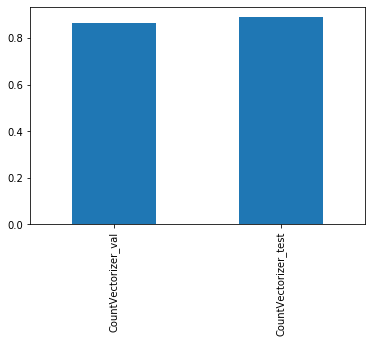

In [77]:
DataFrame.from_dict(data = analytics, orient='index').plot(kind='bar', legend=False)